### ECO TYPE : FOREST COVER CLASSIFICATION

### IMPORT LIBRARIES

In [1]:
### IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

### LOAD THE DATASET

In [2]:
### LOAD DATASET

data=pd.read_csv(r"C:\Users\Iswarya\Downloads\cover_type (1).csv")

In [3]:
### CHECK DATASET

data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145885,2834,88,8,376,44,2552,232,227,128,1595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
145886,2832,68,4,390,44,2522,224,231,142,1572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
145887,2829,80,7,390,33,2492,229,228,133,1550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
145888,2826,121,7,379,30,2462,232,234,135,1528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine


### UNDERSTAND THE DATASET

In [4]:
### DATA TYPES AND NULL CHECK

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           145890 non-null  int64  
 1   Aspect                              145890 non-null  int64  
 2   Slope                               145890 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64  
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64  
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64  
 6   Hillshade_9am                       145890 non-null  int64  
 7   Hillshade_Noon                      145890 non-null  int64  
 8   Hillshade_3pm                       145890 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64  
 10  Wilderness_Area_1                   145890 non-null  float64
 11  Wilderness_Area_2         

In [5]:
### DATASET SHAPE

data.shape

(145890, 55)

In [6]:
### TARGET CLASS DISTRIBUTION

data['Cover_Type'].value_counts()

Cover_Type
Lodgepole Pine       103071
Spruce/Fir            31110
Aspen                  3069
Krummholz              2160
Ponderosa Pine         2160
Douglas-fir            2160
Cottonwood/Willow      2160
Name: count, dtype: int64

In [7]:
### NUMERIC SUMMARY

data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
count,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,...,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000
mean,2874.458949,141.127418,11.925574,251.824738,34.554322,3313.827541,217.368106,224.874748,139.788203,3044.958105,...,0.002276,0.004730,0.004222,0.000151,0.000699,0.000069,0.000233,0.005504,0.008294,0.005045
std,210.801279,107.719296,6.319326,192.473899,41.215776,1687.779953,21.590298,16.084851,31.311690,1761.882341,...,0.047650,0.068609,0.064843,0.012279,0.026432,0.008279,0.015264,0.073986,0.090693,0.070848
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2747.000000,54.000000,7.000000,95.000000,7.000000,1848.000000,207.000000,216.000000,121.000000,1608.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2909.000000,108.000000,11.000000,212.000000,23.000000,3420.000000,222.000000,226.000000,140.000000,2713.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3004.000000,217.000000,15.000000,362.000000,51.000000,4673.000000,232.000000,236.000000,159.000000,4478.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3849.000000,360.000000,61.000000,1343.000000,554.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### DATA CLEANING

In [8]:
### CHECK MISSING VALUE

data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [9]:
### CHECK DUPLICATE VALUE

data.duplicated().sum()

np.int64(0)

### HANDLE OUTLIER

### BEFORE OUTLIER

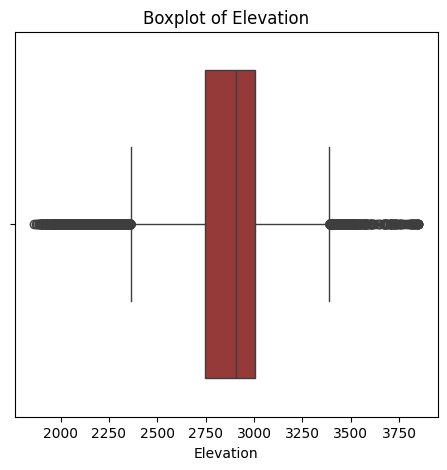

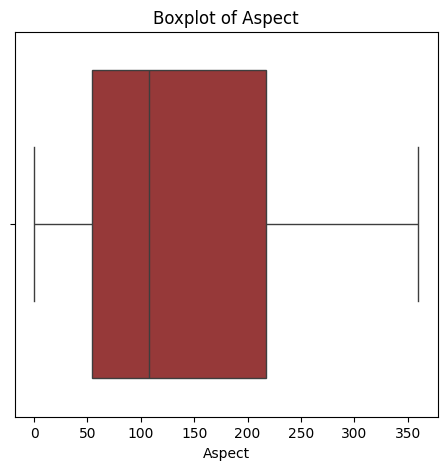

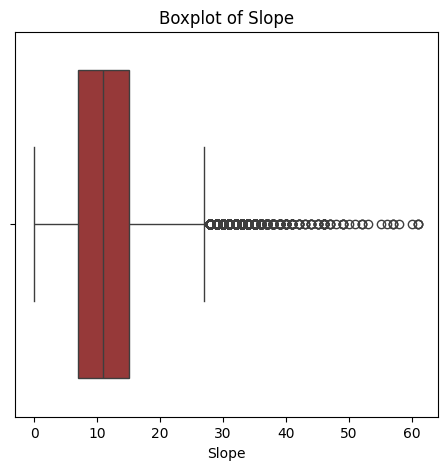

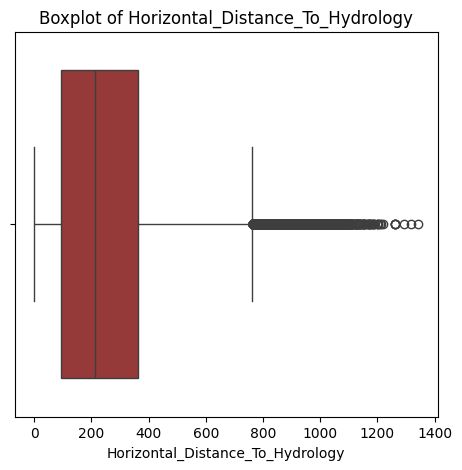

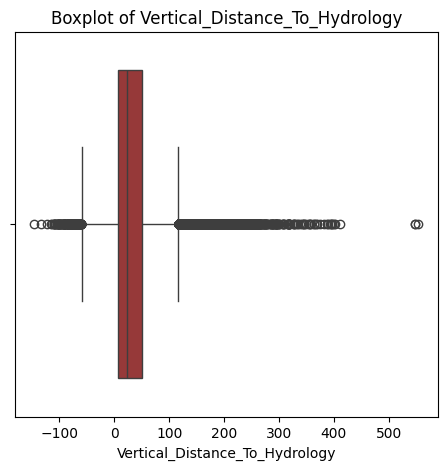

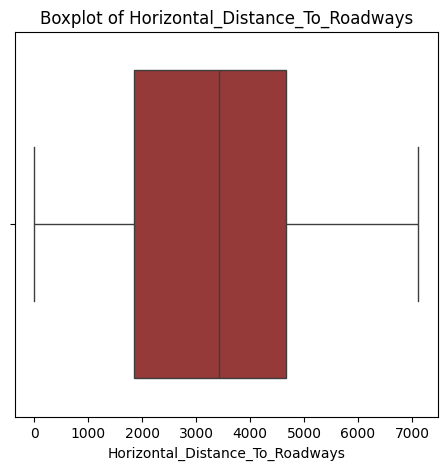

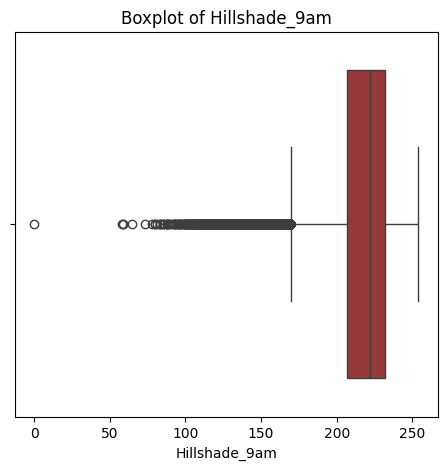

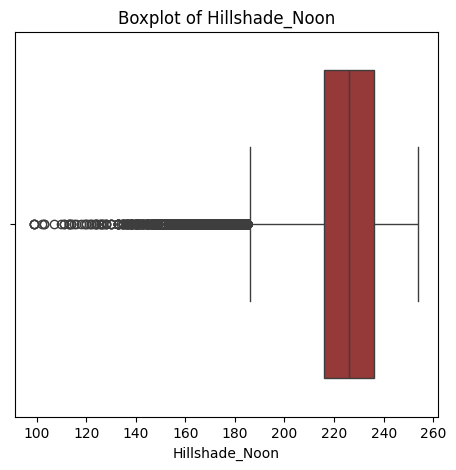

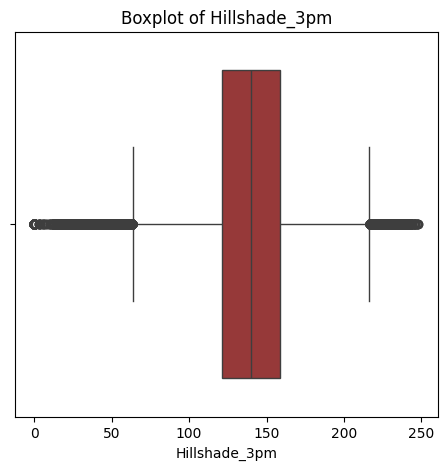

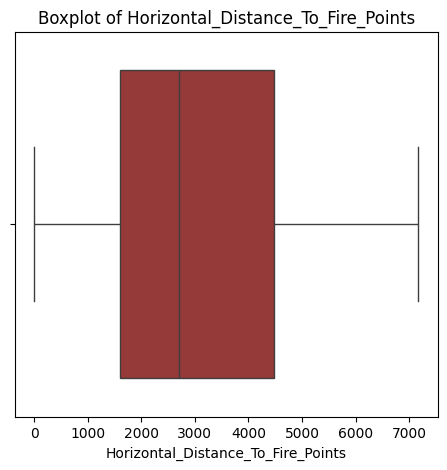

In [10]:
numerical_cols =data.select_dtypes(include=['int64']).columns

### BOX PLOT FOR NUMERIC COLUMNS

for col in numerical_cols:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col],color='brown')
    plt.title(f"Boxplot of {col}")
    plt.show()

In [11]:
# IQR METHOD

numerical_cols =data.select_dtypes(include=['int64']).columns

Q1=data[numerical_cols].quantile(0.25)
Q3=data[numerical_cols].quantile(0.75)
IQR=Q3-Q1

data_capped=data.copy()
for col in numerical_cols:
    lower=Q1[col]-1.5*IQR[col]
    upper=Q3[col]+1.5*IQR[col]
    data_capped[col]=data_capped[col].clip(lower,upper)

### AFTER OUTLIER

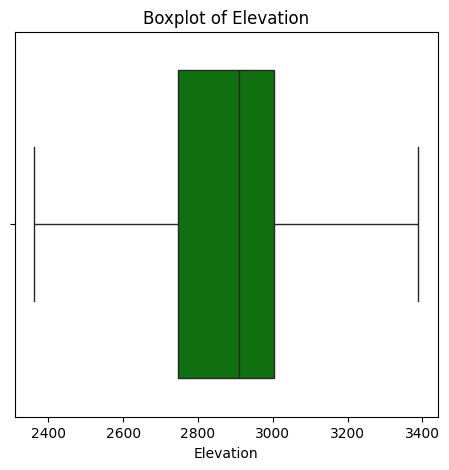

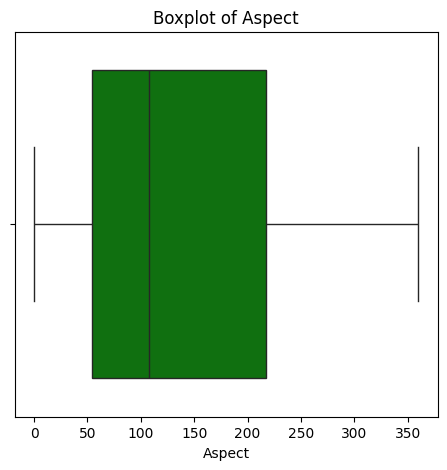

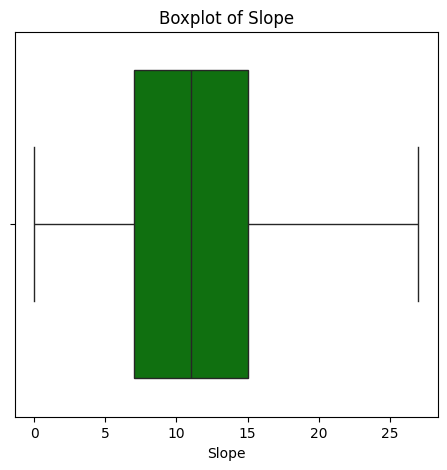

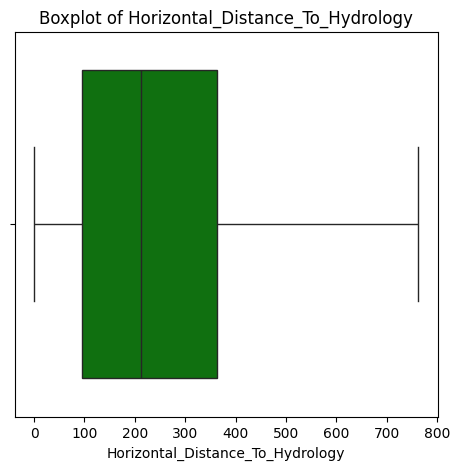

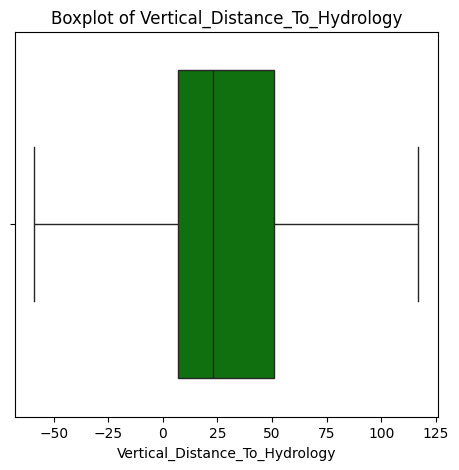

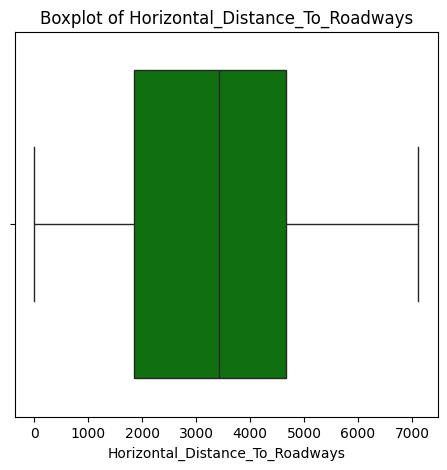

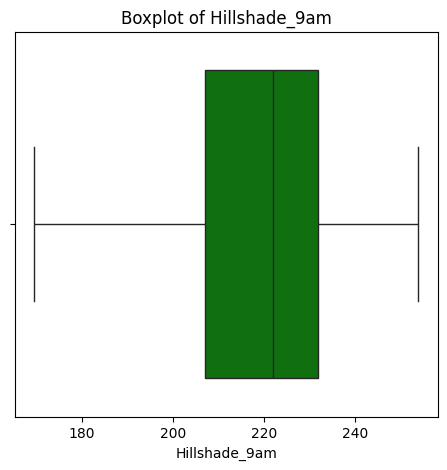

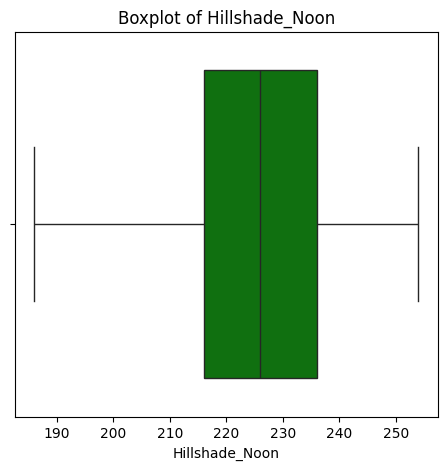

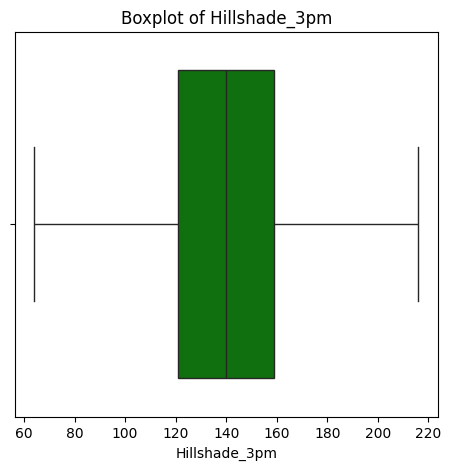

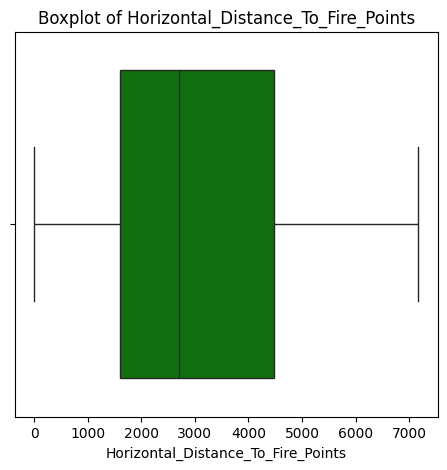

In [12]:
numerical_cols =data.select_dtypes(include=['int64']).columns

### BOX PLOT FOR NUMERIC COLUMNS

for col in numerical_cols:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,2)
    sns.boxplot(x=data_capped[col],color='green')
    plt.title(f"Boxplot of {col}")
    plt.show()

### HANDLE SKEWNESS

In [13]:
### CHECK SKEWNESS

numerical_cols = data.select_dtypes(include=['int64']).columns
skew_values = data_capped[numerical_cols].apply(lambda X: X.skew())
skew_values

Elevation                            -0.340370
Aspect                                0.689432
Slope                                 0.621361
Horizontal_Distance_To_Hydrology      0.792349
Vertical_Distance_To_Hydrology        0.861265
Horizontal_Distance_To_Roadways      -0.058240
Hillshade_9am                        -0.740409
Hillshade_Noon                       -0.505363
Hillshade_3pm                        -0.001189
Horizontal_Distance_To_Fire_Points    0.365249
dtype: float64

### FEATURE ENGINEERING ---> DERIVE NEW COLUMNS

In [14]:
### MEAN HILLSHADE FEATURE
data_capped['Mean_Hillshade'] =(data_capped['Hillshade_9am']+data_capped['Hillshade_Noon']+data_capped['Hillshade_3pm'])/3

### TOTAL DISTANCE FEATURE
data_capped['Total_Distance'] =(data_capped['Horizontal_Distance_To_Hydrology']+data_capped['Horizontal_Distance_To_Roadways']+data_capped['Horizontal_Distance_To_Fire_Points'])

In [15]:
### VERIFY SHAPE
data_capped.shape

(145890, 57)

In [16]:
### VERIFY DATASET
data_capped.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Mean_Hillshade,Total_Distance
0,2596.0,51,3,258.0,0,510,221.0,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen,200.333333,7047.0
1,2590.0,56,2,212.0,-6,390,220.0,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen,202.000000,6827.0
2,2804.0,139,9,268.0,65,3180,234.0,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine,202.333333,9569.0
3,2785.0,155,18,242.0,117,3090,238.0,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine,199.333333,9543.0
4,2595.0,45,2,153.0,-1,391,220.0,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen,201.333333,6716.0


### LABEL ENCODE FOR TARGET DISTRIBUTION

### BEFORE ENCODE FOR COUNT PLOT

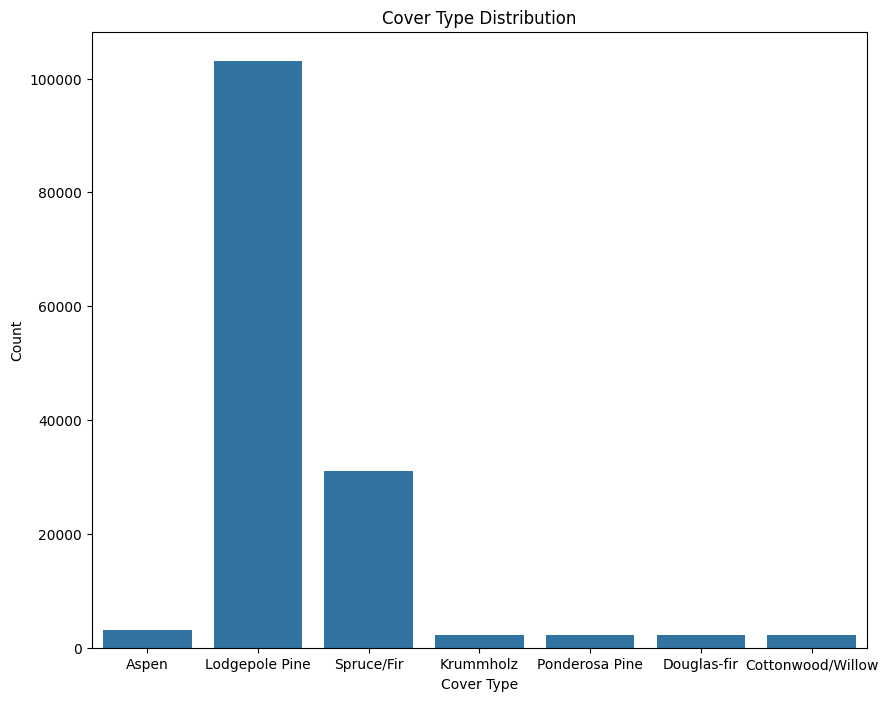

In [17]:
### COUNT PLOT FOR BEFORE ENCODING

plt.figure(figsize=(10,8))
sns.countplot(x='Cover_Type', data=data_capped)
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.title("Cover Type Distribution")
plt.show()

### COVER TYPE ENCODING

In [18]:
### COVER TYPE LABEL ENCODER

le=LabelEncoder()
data_capped['Cover_Type']=le.fit_transform(data_capped['Cover_Type'])
with open("label_encoder.pkl","wb")as f:
    pickle.dump(le,f)
print("Encode saved successfully as label_encoder.pkl")

Encode saved successfully as label_encoder.pkl


### AFTER ENCODE FOR COUNT PLOT

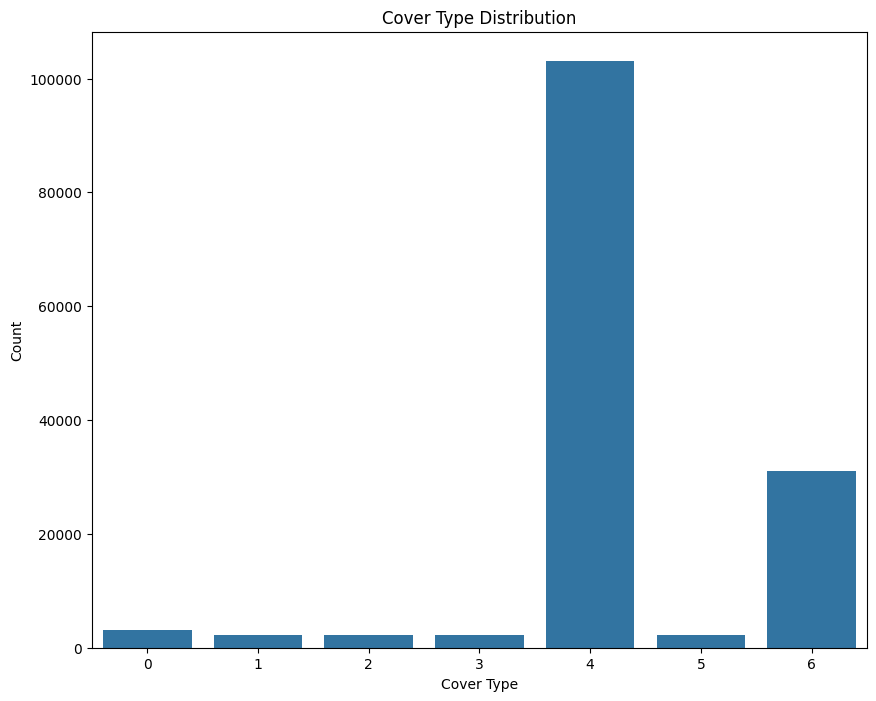

In [19]:
### COUNT PLOT FOR AFTER ENCODING

plt.figure(figsize=(10,8))
sns.countplot(x='Cover_Type', data=data_capped)
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.title("Cover Type Distribution")
plt.show()

### SPLIT DATA

In [20]:
### SPLITING DATA

X = data_capped.drop('Cover_Type', axis=1)
y = data_capped['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_test sahpe:",X_test.shape)
print("y_test sahpe:",y_test.shape)
print("X_train sahpe:",X_train.shape)
print("y_train sahpe:",y_train.shape)

X_test sahpe: (29178, 56)
y_test sahpe: (29178,)
X_train sahpe: (116712, 56)
y_train sahpe: (116712,)


### EDA 

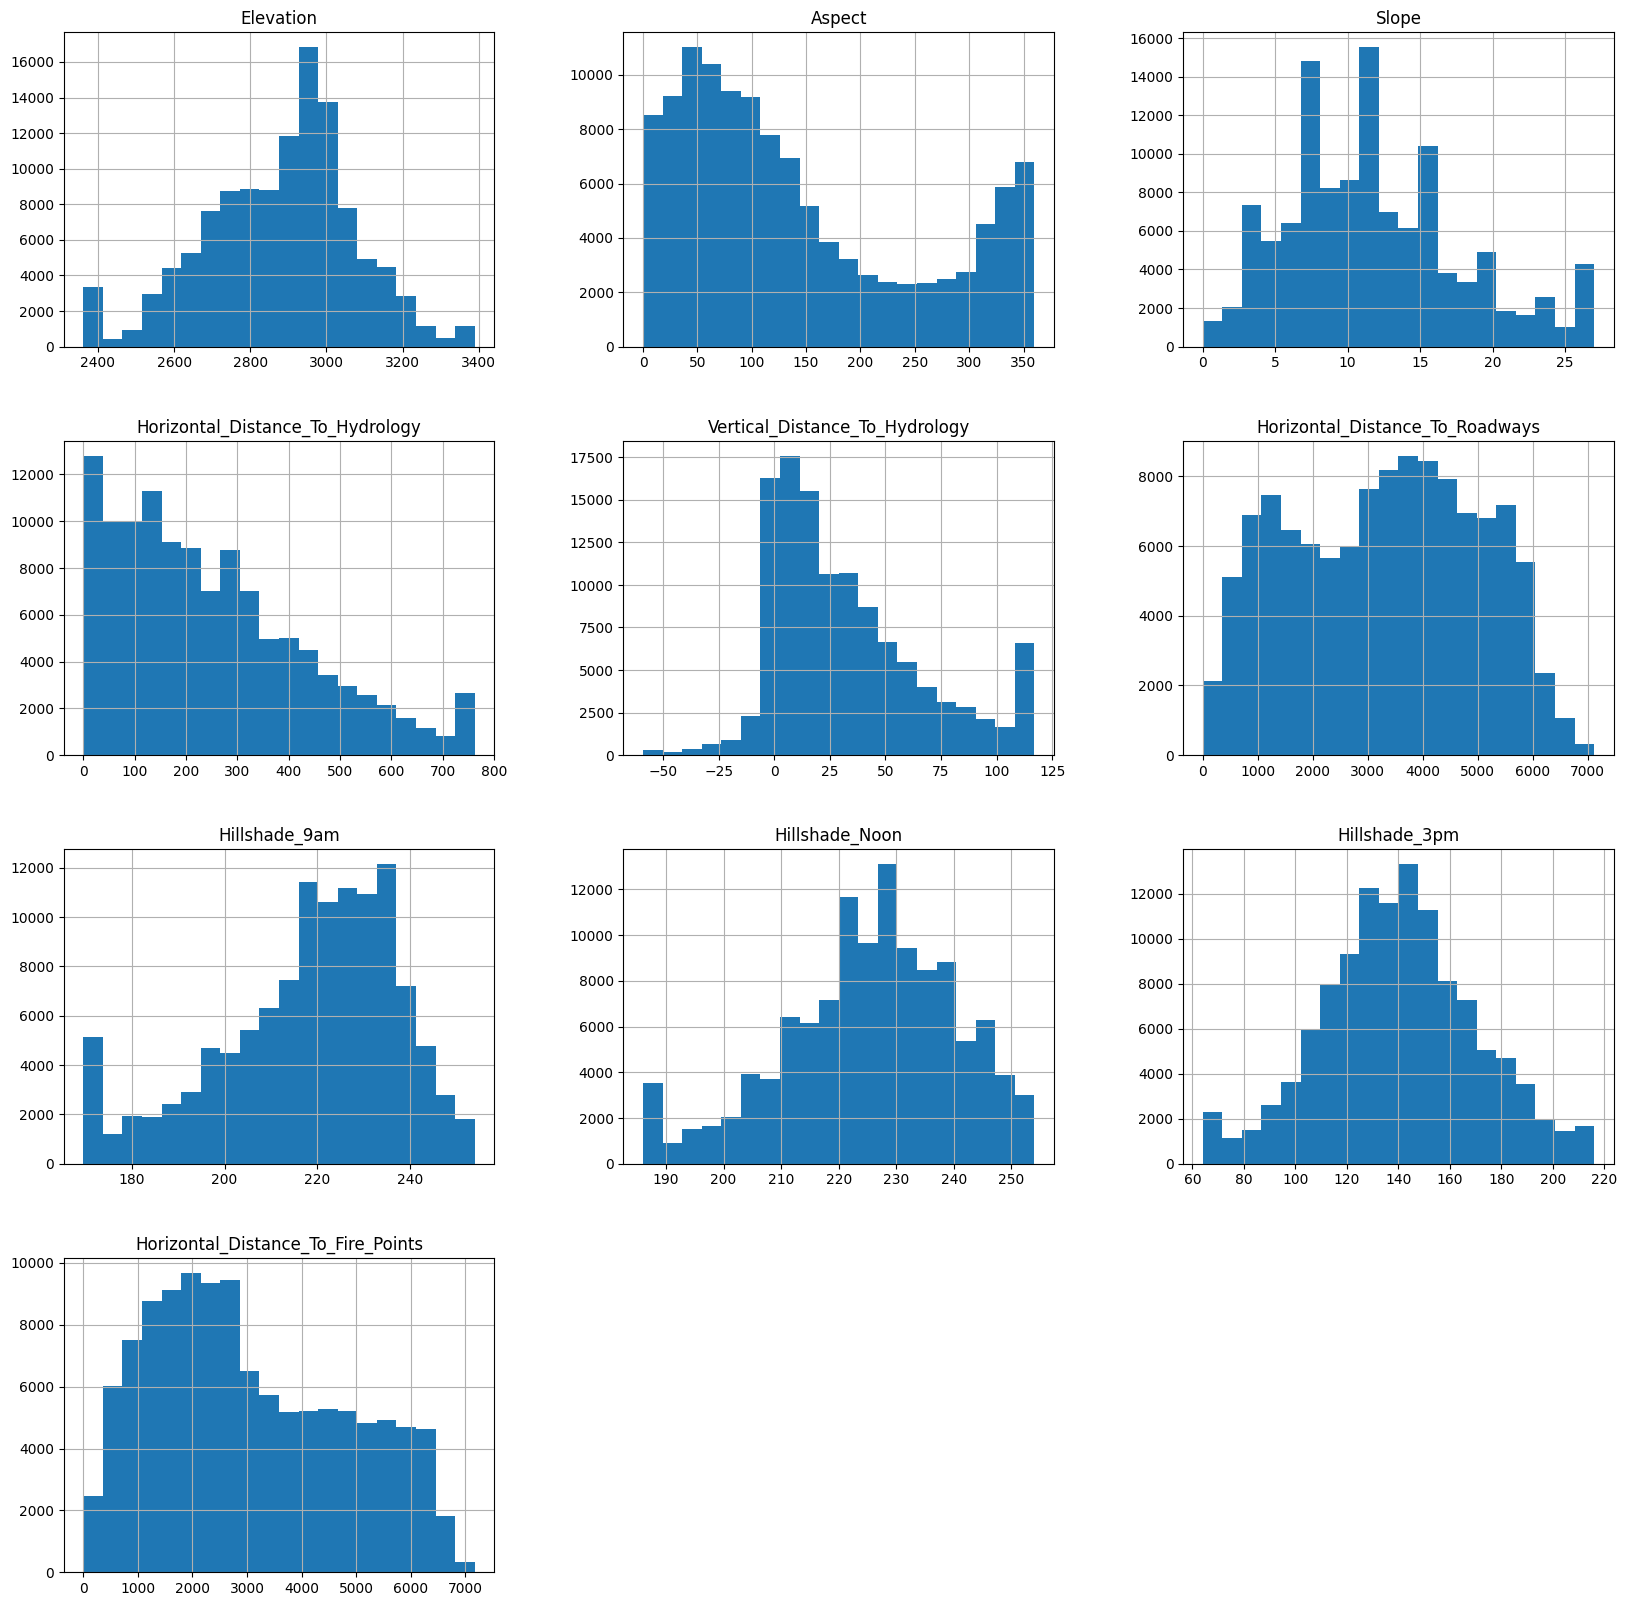

In [21]:
### NUMERIC FEATURE DISTRIBUTIONS

X_train[numerical_cols].hist(figsize=(20,20), bins=20)
plt.show()

### HANDLE CLASS IMBALANCE

In [22]:
### CLASS IMBALANCE HANDLING

X = data_capped.drop('Cover_Type', axis=1)
y = data_capped['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### APPLY SMOTE TO BALANCE CLASSES

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: Cover_Type
4    103071
6     31110
0      3069
3      2160
5      2160
2      2160
1      2160
Name: count, dtype: int64
After SMOTE: Cover_Type
4    82457
5    82457
1    82457
6    82457
3    82457
0    82457
2    82457
Name: count, dtype: int64


### RANDOM FOREST FEATURE SELECTION

In [23]:
### GET FEATURE IMPORTANCES FROM TRAINED RANDOMFOREST MODEL 

rf = RandomForestClassifier(n_estimators=100, random_state=42)  
rf.fit(X_train_resampled, y_train_resampled) 

feat_importances = pd.Series(rf.feature_importances_, index=X_train_resampled.columns)

### SELECT TOP 20 IMPORTANT FEATURES BY SORTING IN DESCENDING ORDER 

important_features = feat_importances.sort_values(ascending=False).head(20).index.tolist()

print(f"Top 20 features selected based on importance:")
print(feat_importances[important_features])

Top 20 features selected based on importance:
Elevation                             0.192464
Total_Distance                        0.094473
Horizontal_Distance_To_Roadways       0.088859
Horizontal_Distance_To_Fire_Points    0.072128
Horizontal_Distance_To_Hydrology      0.054975
Wilderness_Area_1                     0.054589
Wilderness_Area_4                     0.045348
Vertical_Distance_To_Hydrology        0.037729
Soil_Type_10                          0.032208
Wilderness_Area_3                     0.030196
Hillshade_9am                         0.028597
Aspect                                0.027064
Hillshade_3pm                         0.022885
Mean_Hillshade                        0.020365
Hillshade_Noon                        0.019974
Soil_Type_3                           0.019777
Slope                                 0.017749
Soil_Type_38                          0.016776
Soil_Type_39                          0.014661
Soil_Type_4                           0.013623
dtype: float64

### MODEL BUILDING

### USING ONLY THE SELECTED TOP 20 FEATURES

In [24]:
X_train_selected=X_train_resampled[important_features]
X_test_selected=X_test[important_features]

### DECISION TREE CLASSIFIER

In [25]:
dt_model =DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_selected,y_train_resampled)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
y_pred_dt=dt_model.predict(X_test_selected)

print("DecisionTreeClassifier Accuracy:",accuracy_score(y_test,y_pred_dt))
print("\nDecisionTreeClassifier Classification Report:\n",confusion_matrix(y_test,y_pred_dt))
print("\nDecisionTreeClassifier Confusion Matrix:\n",classification_report(y_test,y_pred_dt))

DecisionTreeClassifier Accuracy: 0.9418397422715745

DecisionTreeClassifier Classification Report:
 [[  536     0    12     0    47    11     8]
 [    0   399    15     0     0    18     0]
 [   10    15   354     0     8    45     0]
 [    2     0     0   401     2     0    27]
 [   85     0    13     4 19802    11   699]
 [   10    10    55     0     6   351     0]
 [   20     0     2    38   523     1  5638]]

DecisionTreeClassifier Confusion Matrix:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       614
           1       0.94      0.92      0.93       432
           2       0.78      0.82      0.80       432
           3       0.91      0.93      0.92       432
           4       0.97      0.96      0.97     20614
           5       0.80      0.81      0.81       432
           6       0.88      0.91      0.90      6222

    accuracy                           0.94     29178
   macro avg       0.87      0.89      0.88     29178

### RANDOM FOREST CLASSIFIER

In [27]:
rf_model= RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1,max_depth=20)
rf_model.fit(X_train_selected,y_train_resampled)

,n_estimators,100
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred_rf=rf_model.predict(X_test_selected)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classifier Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nRandom Forest Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.943416272534101

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       614
           1       0.94      0.94      0.94       432
           2       0.85      0.87      0.86       432
           3       0.92      0.99      0.95       432
           4       0.98      0.95      0.96     20614
           5       0.84      0.87      0.86       432
           6       0.87      0.92      0.89      6222

    accuracy                           0.94     29178
   macro avg       0.89      0.93      0.91     29178
weighted avg       0.95      0.94      0.94     29178


Random Forest Classifier Confusion Matrix:
 [[  576     0     5     0    26     7     0]
 [    0   407     9     0     0    16     0]
 [    5    12   377     0     1    37     0]
 [    0     0     0   426     0     0     6]
 [  101     0    16     3 19638    10   846]
 [    4    13    37     0     1   377    

### LOGISTIC REGRESSION

In [29]:
lr_model=make_pipeline(StandardScaler(),LogisticRegression(max_iter=5000,random_state=42))
lr_model.fit(X_train_selected,y_train_resampled)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [30]:
y_pred_lr=lr_model.predict(X_test_selected)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\n Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7953937898416615

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.50      0.40       614
           1       0.80      0.88      0.84       432
           2       0.57      0.65      0.61       432
           3       0.70      0.98      0.82       432
           4       0.86      0.89      0.87     20614
           5       0.63      0.56      0.59       432
           6       0.66      0.50      0.57      6222

    accuracy                           0.80     29178
   macro avg       0.65      0.71      0.67     29178
weighted avg       0.79      0.80      0.79     29178


 Logistic Regression Confusion Matrix:
 [[  305     0    36     0   262    11     0]
 [    0   382    23     0     0    27     0]
 [    8    47   282     0     0    95     0]
 [    4     0     0   425     0     0     3]
 [  501     0    18    23 18443     8  1621]
 [    8    49   133     0     0   242     0

### K-NEAREST NEIGHBORS (KNN)

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_selected, y_train_resampled)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [32]:
y_pred_knn = knn_model.predict(X_test_selected)

print("KNN Accuracy:", accuracy_score(y_test,y_pred_knn))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test,y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test,y_pred_knn))

KNN Accuracy: 0.9465007882651313

KNN Confusion Matrix:
 [[  590     0     2     0    13     5     4]
 [    0   404    14     0     0    14     0]
 [    2    13   357     0    10    50     0]
 [    0     0     0   425     0     0     7]
 [  189     0    36    16 19532    28   813]
 [    6    21    52     0    10   343     0]
 [   38     0     1    60   157     0  5966]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82       614
           1       0.92      0.94      0.93       432
           2       0.77      0.83      0.80       432
           3       0.85      0.98      0.91       432
           4       0.99      0.95      0.97     20614
           5       0.78      0.79      0.79       432
           6       0.88      0.96      0.92      6222

    accuracy                           0.95     29178
   macro avg       0.84      0.92      0.88     29178
weighted avg       0.95      0.95      0.95     29178



### XGBOOST CLASSIFIER

In [33]:
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_selected, y_train_resampled)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [34]:
y_pred_xgb = xgb_model.predict(X_test_selected)

print("XGBoost Accuracy:", accuracy_score(y_test,y_pred_xgb))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test,y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test,y_pred_xgb))

XGBoost Accuracy: 0.9158612653368977

XGBoost Confusion Matrix:
 [[  580     0     4     0    20     9     1]
 [    0   410     9     0     0    13     0]
 [    4    12   375     0     0    41     0]
 [    2     0     0   424     1     0     5]
 [  160     0    12     4 19188    10  1240]
 [    5    13    44     0     0   370     0]
 [   32     0     3    43   766     2  5376]]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83       614
           1       0.94      0.95      0.95       432
           2       0.84      0.87      0.85       432
           3       0.90      0.98      0.94       432
           4       0.96      0.93      0.95     20614
           5       0.83      0.86      0.84       432
           6       0.81      0.86      0.84      6222

    accuracy                           0.92     29178
   macro avg       0.86      0.91      0.88     29178
weighted avg       0.92      0.92      0.92 

In [35]:
### CONVERT MODEL INTO DATAFRAME

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_xgb)
    ]
})

print(results.sort_values(by="Accuracy", ascending=False))

                 Model  Accuracy
3                  KNN  0.946501
1        Random Forest  0.943416
0        Decision Tree  0.941840
4              XGBoost  0.915861
2  Logistic Regression  0.795394


### HYPERPARAMETER TUNING

In [36]:
### DEFINE SAME MODEL

rf = RandomForestClassifier(random_state=42)

### DEFINE PARAMETER DISTRIBUTION

param_dist = {
    'n_estimators': [100, 200, 300, 500],       
    'max_depth': [10, 20, 30, 50, None],        
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 4],              
    'max_features': ['sqrt', 'log2'],           
    'bootstrap': [True, False]                  
}

### RANDOMIZED SEARCH 

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,            
    cv=3,                 
    scoring='accuracy',   
    n_jobs=-1,            
    verbose=2,
    random_state=42
)

### FIT MODEL

random_search.fit(X_train_selected, y_train_resampled)

### EVALUATE ON TEST DATA 

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_selected)

print("best parameters:",random_search.best_params_)
print("\n Test Accuracy:", accuracy_score(y_test,y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}

 Test Accuracy: 0.960895195009939


In [37]:
### SAVE (DUMP) MODEL

with open('best_random_forest_model.pkl','wb') as file:
    pickle.dump(best_rf,file)

print("Model Saved Successfully as best_random_model.pkl")    


Model Saved Successfully as best_random_model.pkl
